
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)




## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron (i.e. Neural Network)
    - Analyze and Compare
4. [Keras MMP](#Q3)


____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

____

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**

- **Input Layer:** 

- **Hidden Layer:** 

- **Output Layer:**

- **Activation:** 

Neuron - A neuron is a node that takes in data and computes a weighted average of its input, as well as add a bias and activation function to deliver a certain output.

Input Layer - The first layer of a forward-feeding neural network where initial data is fed through. The number of nodes in this layer should correspond with the size of the input vector.

Hidden Layer - The layer(s) of a forward-feeding neural network between an input layer and output layer with varying quantities of nodes. It calculates the activated weighted sum of the previous layer's output and passes this information to the next layer.

Output Layer - the layer of a forward-feeding neural network that provides the output predictions. The number of nodes should correspond to the number of unique categories to predict in the target variable (if 3 or more). It should have one node if its a binary classification problem.

Activation - a function in each neuron that is applied to each node's weighted sum and bias input to help it learn and determine the information to pass to the next neuron.

- `Explain` how Back-propagation works 
- `Explain` how Gradient Descent works (mention the learning rate)
- `Explain` how Back-propagation and Gradient Descent are related   

Use your own words, but feel free to reference external materials for this question. 

Back propagation - back propagation is a process that finds the errors for all training examples (total cost of the network) and tunes its weights (in reverse order) most efficiently to minimize this error (or loss).

Gradient Descent -  A gradient is a multi-dimensional derivative of a cost function. Gradient Descent is the process of finding a minimum of that cost function (increase accuracy), and learning rate controls how much to change the model based on changes to model weights.

Back-Propagation & Gradient Descent - Backpropagation computes the gradient of a loss function and updates its weights to minimize this loss as it finds the point of least error (minimum) via a process called gradient descent.

Remember our Simple Perceptron Class from Monday. 

- Describe the process of making a prediction, i.e. how do you go from inputs to outputs?

In a simple perceptron example, data is passed into the neuron with weights associated with each data point. A weighted sum is calculated, a bias term is added, and an activation function is applied. The activation function helps the neuron learn and pass information to the next neuron.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using `Keras`. After you build these two models, compare the results of the model.

In [1]:
"""
Our Dataset
"""
import numpy as np


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [2]:
X.shape

(300, 2)

In [3]:
X

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [4]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [5]:
2**2

4

In [6]:
4**4

256

This word is speled wrong. 

### Simple Perceptron
Construct a simple perceptron using Keras. 

Make sure to include the following in your model:
- Add `1 dense layer` with a `single neuron` 
- Use a `sigmoid activation function`
- Set `epochs` to 10 
- Use the version of `crossentropy loss` that is appropriate for this data.

Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [7]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# build and fit model
model1 = Sequential()

# add input layer / first hidden layer
model1.add(Dense(1,
                activation="sigmoid",
                input_dim=2))

# compile the model
model1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Fit the model
h1 = model1.fit(X, y, epochs=10, validation_split=0.2)

Epoch 1/10
8/8 [==============================] - 1s 84ms/step - loss: 0.7626 - accuracy: 0.6026 - val_loss: 0.9012 - val_accuracy: 0.4333
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.7330 - accuracy: 0.6052 - val_loss: 0.8985 - val_accuracy: 0.4333
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.7624 - accuracy: 0.6069 - val_loss: 0.8959 - val_accuracy: 0.4333
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.7843 - accuracy: 0.5913 - val_loss: 0.8934 - val_accuracy: 0.4333
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.7284 - accuracy: 0.6021 - val_loss: 0.8912 - val_accuracy: 0.4333
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.8001 - accuracy: 0.5544 - val_loss: 0.8890 - val_accuracy: 0.4333
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.7542 - accuracy: 0.6066 - val_loss: 0.8867 - val_accuracy: 0.4333
Epoch 8/10
8/8 [=================

In [8]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [9]:
model1.get_config()["layers"]

[{'class_name': 'InputLayer',
  'config': {'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'sparse': False,
   'ragged': False,
   'name': 'dense_input'}},
 {'class_name': 'Dense',
  'config': {'name': 'dense',
   'trainable': True,
   'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'units': 1,
   'activation': 'sigmoid',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'GlorotUniform',
    'config': {'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}}]

In [10]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron model (also known as a neural network). 

Your neural network `must` have: 
- `2` Hidden Layers
- Select any number between `5-32` for the number of neurons in each hidden layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`
- Your model should be called `model2` 
- Save the results of your fit statement to a variable called `h2`. 
- Use the version of `crossentropy loss` that is appropriate for this data.

In [11]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        # if model reaches 99% accuracy, training is terminated 
        acc_threshold = 0.99
        if(logs.get('accuracy') > acc_threshold):   
            self.model.stop_training = True
            self.model.callback_used = True

# Instantiate object
myCallback_obj = myCallback()

In [12]:
# build and fit model

# instantiate model
model2 = Sequential()

# input layer/first hidden layer
model2.add(Dense(32,
                 activation="relu",
                 input_dim=2))

# hidden layer
model2.add(Dense(16,
                 activation="relu"))

# output layer
model2.add(Dense(1,
                 activation="sigmoid"))

# compile model
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# fit model
h2 = model2.fit(X, y, epochs=100, validation_split=0.2, callbacks=[myCallback_obj])

Epoch 1/100
8/8 [==============================] - 0s 19ms/step - loss: 0.6832 - accuracy: 0.6046 - val_loss: 0.6786 - val_accuracy: 0.5667
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6633 - accuracy: 0.6286 - val_loss: 0.6660 - val_accuracy: 0.6333
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6445 - accuracy: 0.7435 - val_loss: 0.6537 - val_accuracy: 0.7667
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6315 - accuracy: 0.8536 - val_loss: 0.6418 - val_accuracy: 0.8333
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6173 - accuracy: 0.8498 - val_loss: 0.6306 - val_accuracy: 0.8000
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5979 - accuracy: 0.8782 - val_loss: 0.6192 - val_accuracy: 0.8167
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5946 - accuracy: 0.8276 - val_loss: 0.6068 - val_accuracy: 0.8167
Epoch 8/100
8/8 [=========

In [13]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

In [14]:
# Hidden tests - you will see the results when you submit to Canvas

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. 

Install the package `mlxtend` into the environment you are using for the sprint challenge.

You can install this package using the following statement in the terminal

```python
pip install mlxtend
```

Or you can install this package using the following statement in your notebook

```python
!pip install mlxtend
```

If you choose to install this package from within your notebook, be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash. 


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [15]:
X.shape, y.shape

((300, 2), (300,))

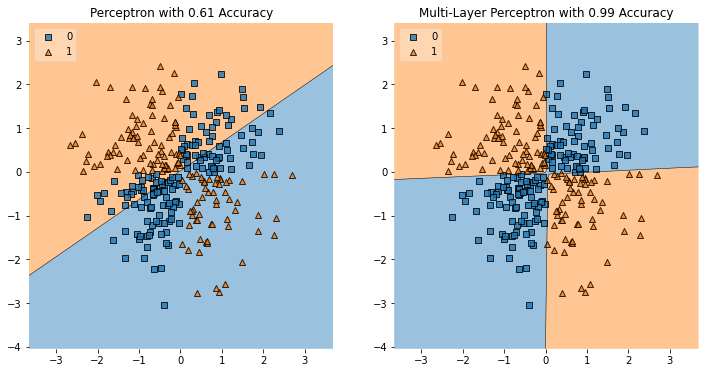

In [16]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

1) Why does the Perceptron (`model1`) only achieve about 50% accuracy? 

2) What is the architectural property of the Multi-Layer Perceptron that allows it to more accurately learn the relationship between X and y? 
- Hint: recall that each layer represents a vector space and they usually have a different number of dimensions, $\mathbb{R}^N$.
   

1.) The perceptron model only achieves ~50% accuracy because perceptrons can only draw linear decision boundaries. It's only once you add multi-layer perceptron models where you can draw non-linear decision boundaries.

2.) The multi-layer perceptron model can draw decision boundaries in multi-dimensional space, therefore can more accurately learn the relationship between X and y. With the layers I created in this model, it can find the relationship between X and y by looking at its relationship in different dimensions, whereas the first model can only work with one dimension. 

## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyper-parameters tune two parameters each with no more than 2 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset provided (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyper-parameters tune your model. 
    - **Use `n_jobs` = 1**
- When hyper-parameters tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyper-parameters as you test them so that we can easily see which resulted in the highest accuracy.

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1


In [18]:
# Create an input matrix named 'X' store it in a 2D numpy array
X = df.drop(columns="target").values

# Create an output vector for the labels named 'Y', store it in 1D numpy array
Y = df['target'].values

In [19]:
X.shape

(303, 13)

In [20]:
X

array([[70.,  1.,  0., ...,  1.,  3.,  2.],
       [59.,  1.,  3., ...,  1.,  0.,  3.],
       [46.,  1.,  2., ...,  1.,  0.,  2.],
       ...,
       [52.,  1.,  0., ...,  1.,  0.,  0.],
       [58.,  1.,  0., ...,  2.,  0.,  3.],
       [39.,  1.,  2., ...,  2.,  0.,  2.]])

In [21]:
Y.shape

(303,)

In [22]:
Y

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,

In [23]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [24]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [25]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier
def create_model():
    
    # instantiate model
    model = Sequential()
    
    # add input layer/first hidden layer
    model.add(Dense(100,
                    activation="relu",
                    input_dim=13))
    
    # hidden layer 2
    model.add(Dense(300,
                    activation="relu"))
    
    # hidden layer 3
    model.add(Dense(50,
                    activation="relu"))
    
    # output layer
    model.add(Dense(1,
                    activation="sigmoid"))
    
    # compile model
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    
    return model

# instantiate model
model = create_model()

# fit model
model.fit(X, Y, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 1ms/step - loss: 6.5014 - accuracy: 0.4876
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 1.8382 - accuracy: 0.6299
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 1.4545 - accuracy: 0.6214
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 1.1791 - accuracy: 0.6831
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 1.0451 - accuracy: 0.6730
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7819 - accuracy: 0.6677
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7914 - accuracy: 0.6291
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.6708
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.6653
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.6517


Baseline accuracy: 0.5945 / Highest score during training: 0.7312

In [26]:
# Visible Testing
assert create_model().__module__ == 'tensorflow.python.keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."

In [27]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
model = KerasClassifier(build_fn=create_model)

In [28]:
# Visible Testing
assert model.__module__ == 'tensorflow.python.keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [29]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with 2 possible values for each 

param_grid = {
    "batch_size": [5, 50],
    "epochs": [10, 20]
}

In [30]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [31]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 
gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10, cv=3)

grid_result = gs.fit(X, Y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START batch_size=5, epochs=10.....................................
Epoch 1/10
41/41 [==============================] - 0s 885us/step - loss: 5.2366 - accuracy: 0.4912
Epoch 2/10
41/41 [==============================] - 0s 854us/step - loss: 1.0892 - accuracy: 0.6016
Epoch 3/10
41/41 [==============================] - 0s 889us/step - loss: 0.8229 - accuracy: 0.6291
Epoch 4/10
41/41 [==============================] - 0s 831us/step - loss: 1.6212 - accuracy: 0.6288
Epoch 5/10
41/41 [==============================] - 0s 815us/step - loss: 0.8406 - accuracy: 0.6512
Epoch 6/10
41/41 [==============================] - 0s 826us/step - loss: 0.8435 - accuracy: 0.6386
Epoch 7/10
41/41 [==============================] - 0s 877us/step - loss: 0.8317 - accuracy: 0.6332
Epoch 8/10
41/41 [==============================] - 0s 828us/step - loss: 0.5590 - accuracy: 0.7033
Epoch 9/10
41/41 [==============================] - 0s 833u

3/3 [==============================] - 0s 1ms/step - loss: 0.7382 - accuracy: 0.6535
[CV 1/3; 4/4] END .....batch_size=50, epochs=20;, score=0.653 total time=   0.7s
[CV 2/3; 4/4] START batch_size=50, epochs=20....................................
Epoch 1/20
5/5 [==============================] - 0s 1ms/step - loss: 10.2392 - accuracy: 0.4454
Epoch 2/20
5/5 [==============================] - 0s 2ms/step - loss: 3.6956 - accuracy: 0.5455
Epoch 3/20
5/5 [==============================] - 0s 2ms/step - loss: 1.7644 - accuracy: 0.4949
Epoch 4/20
5/5 [==============================] - 0s 1ms/step - loss: 1.2252 - accuracy: 0.5568
Epoch 5/20
5/5 [==============================] - 0s 1ms/step - loss: 1.0490 - accuracy: 0.5082
Epoch 6/20
5/5 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.6673
Epoch 7/20
5/5 [==============================] - 0s 1ms/step - loss: 0.8995 - accuracy: 0.6278
Epoch 8/20
5/5 [==============================] - 0s 1ms/step - loss: 0.8452 - a

In [32]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.7260726094245911 using {'batch_size': 5, 'epochs': 20}
Means: 0.646864672501882, Stdev: 0.0336568844486241 with: {'batch_size': 5, 'epochs': 10}
Means: 0.7260726094245911, Stdev: 0.023336878607876067 with: {'batch_size': 5, 'epochs': 20}
Means: 0.669966995716095, Stdev: 0.028390527067787094 with: {'batch_size': 50, 'epochs': 10}
Means: 0.6204620401064554, Stdev: 0.053826737853757106 with: {'batch_size': 50, 'epochs': 20}
